# General workflow
This workflow is a starting point to demonstrate the functionality of the containers and to detect and classify difficult cases

In [1]:

import numpy as np
import pandas as pd
import skimage
import Images
import ModelUNet_rep


C:\Users\BKY\AppData\Local\Programs\Python\Python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#some definitions
debug=False #perform on a subset --> faster
model_shape=(256,256,3) #works with shape (2^x, 2^x) only?
model_name='unet_v1_{}x{}'.format(model_shape[0],model_shape[1])
if debug:
    model_name += '_debug'

print('the model will be called \''+model_name+'\'')


the model will be called 'unet_v1_256x256'


## Training
* load training data
* train the model (if not yet done)
* 

In [3]:
train=Images.Images("../input/stage1_train")
if debug:
    #subselect, to make it faster 
    train=train.subset(idx=range(20))
    #todo: overload [] to get this


#set aside 10% for validation
val=train.subset(np.arange(train.n()*.9, train.n()))
train=train.subset(np.arange(train.n()*.9,))

#load the image files (in original size)    
train.load_images()
train.load_masks()
train.features.head()    



100%|████████████████████████████████████████████████████████████████████████████████| 603/603 [01:52<00:00,  5.36it/s]


,ids,size_x,size_y,n_channels,nuclei_n,nuclei_meanSz,nuclei_stdSz,nuclei_minSz,nuclei_maxSz
0,00071198d059ba7f5914a526d124d28e6d010c92466da2...,256,256,1,27,211,132,21,460
1,003cee89357d9fe13516167fd67b609a164651b2193458...,256,256,1,36,131,37,35,276
2,00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b074...,256,320,3,70,419,208,56,1067
3,0121d6759c5adb290c8e828fc882f37dfaf3663ec885c6...,256,320,3,86,168,151,22,752
4,01d44a26f6680c42ba94c9bc6339228579a95d0e2695b1...,256,320,3,7,813,402,152,1563


In [4]:
# initialize and train the model 
# to detect unlabled masks (e.g. the forground vs background)


m_file=model_name+'.h5'

model=ModelUNet_rep.ModelUNet(m_file=m_file, shape=(256,256,3))
#question: should the model design be adapted according to image dimensions?
if not model.trained:
    model.fit_model(train)


Train on 542 samples, validate on 61 samples
Epoch 1/50
528/542 [============================>.] - ETA: 3:20 - loss: 0.7142 - mean_iou: 0.0000e+ - ETA: 1:47 - loss: 0.6634 - mean_iou: 0.2096   - ETA: 1:16 - loss: 0.6407 - mean_iou: 0.28 - ETA: 1:00 - loss: 0.6088 - mean_iou: 0.31 - ETA: 50s - loss: 0.5637 - mean_iou: 0.3399 - ETA: 43s - loss: 0.5551 - mean_iou: 0.354 - ETA: 38s - loss: 0.6424 - mean_iou: 0.365 - ETA: 34s - loss: 0.6316 - mean_iou: 0.370 - ETA: 31s - loss: 0.6069 - mean_iou: 0.374 - ETA: 28s - loss: 0.5893 - mean_iou: 0.378 - ETA: 26s - loss: 0.5810 - mean_iou: 0.381 - ETA: 24s - loss: 0.5655 - mean_iou: 0.384 - ETA: 22s - loss: 0.5620 - mean_iou: 0.387 - ETA: 21s - loss: 0.5581 - mean_iou: 0.389 - ETA: 19s - loss: 0.5478 - mean_iou: 0.391 - ETA: 18s - loss: 0.5402 - mean_iou: 0.393 - ETA: 16s - loss: 0.5337 - mean_iou: 0.394 - ETA: 15s - loss: 0.5267 - mean_iou: 0.396 - ETA: 14s - loss: 0.5195 - mean_iou: 0.397 - ETA: 13s - loss: 0.5202 - mean_iou: 0.398 - ETA: 11s - l

528/542 [============================>.] - ETA: 21s - loss: 0.1049 - mean_iou: 0.662 - ETA: 21s - loss: 0.1102 - mean_iou: 0.662 - ETA: 20s - loss: 0.1172 - mean_iou: 0.663 - ETA: 19s - loss: 0.1178 - mean_iou: 0.663 - ETA: 18s - loss: 0.1198 - mean_iou: 0.663 - ETA: 18s - loss: 0.1192 - mean_iou: 0.664 - ETA: 17s - loss: 0.1165 - mean_iou: 0.664 - ETA: 16s - loss: 0.1124 - mean_iou: 0.664 - ETA: 16s - loss: 0.1116 - mean_iou: 0.665 - ETA: 15s - loss: 0.1092 - mean_iou: 0.665 - ETA: 14s - loss: 0.1079 - mean_iou: 0.666 - ETA: 14s - loss: 0.1066 - mean_iou: 0.666 - ETA: 13s - loss: 0.1084 - mean_iou: 0.667 - ETA: 13s - loss: 0.1080 - mean_iou: 0.667 - ETA: 12s - loss: 0.1061 - mean_iou: 0.668 - ETA: 11s - loss: 0.1064 - mean_iou: 0.668 - ETA: 11s - loss: 0.1089 - mean_iou: 0.669 - ETA: 10s - loss: 0.1090 - mean_iou: 0.669 - ETA: 9s - loss: 0.1079 - mean_iou: 0.669 - ETA: 9s - loss: 0.1098 - mean_iou: 0.67 - ETA: 8s - loss: 0.1089 - mean_iou: 0.67 - ETA: 7s - loss: 0.1091 - mean_iou: 0.6

528/542 [============================>.] - ETA: 22s - loss: 0.1349 - mean_iou: 0.743 - ETA: 21s - loss: 0.1181 - mean_iou: 0.743 - ETA: 21s - loss: 0.1267 - mean_iou: 0.743 - ETA: 20s - loss: 0.1220 - mean_iou: 0.743 - ETA: 19s - loss: 0.1099 - mean_iou: 0.743 - ETA: 18s - loss: 0.1082 - mean_iou: 0.743 - ETA: 18s - loss: 0.1078 - mean_iou: 0.743 - ETA: 17s - loss: 0.1033 - mean_iou: 0.744 - ETA: 16s - loss: 0.1000 - mean_iou: 0.744 - ETA: 15s - loss: 0.0971 - mean_iou: 0.744 - ETA: 15s - loss: 0.0975 - mean_iou: 0.744 - ETA: 14s - loss: 0.0954 - mean_iou: 0.744 - ETA: 13s - loss: 0.0930 - mean_iou: 0.744 - ETA: 13s - loss: 0.0946 - mean_iou: 0.744 - ETA: 12s - loss: 0.0932 - mean_iou: 0.745 - ETA: 11s - loss: 0.0944 - mean_iou: 0.745 - ETA: 11s - loss: 0.0950 - mean_iou: 0.745 - ETA: 10s - loss: 0.0971 - mean_iou: 0.745 - ETA: 9s - loss: 0.0960 - mean_iou: 0.745 - ETA: 9s - loss: 0.0968 - mean_iou: 0.74 - ETA: 8s - loss: 0.0961 - mean_iou: 0.74 - ETA: 7s - loss: 0.0961 - mean_iou: 0.7

542/542 [==============================] - 23s 43ms/step - loss: 0.0869 - mean_iou: 0.7777 - val_loss: 0.0623 - val_mean_iou: 0.7807
Epoch 14/50
528/542 [============================>.] - ETA: 21s - loss: 0.0937 - mean_iou: 0.781 - ETA: 20s - loss: 0.0916 - mean_iou: 0.781 - ETA: 20s - loss: 0.0968 - mean_iou: 0.781 - ETA: 19s - loss: 0.0989 - mean_iou: 0.781 - ETA: 19s - loss: 0.0997 - mean_iou: 0.781 - ETA: 18s - loss: 0.0972 - mean_iou: 0.781 - ETA: 17s - loss: 0.0963 - mean_iou: 0.781 - ETA: 17s - loss: 0.0989 - mean_iou: 0.781 - ETA: 16s - loss: 0.0916 - mean_iou: 0.781 - ETA: 15s - loss: 0.0910 - mean_iou: 0.781 - ETA: 15s - loss: 0.0926 - mean_iou: 0.781 - ETA: 14s - loss: 0.0897 - mean_iou: 0.781 - ETA: 13s - loss: 0.0882 - mean_iou: 0.781 - ETA: 13s - loss: 0.0875 - mean_iou: 0.781 - ETA: 12s - loss: 0.0873 - mean_iou: 0.782 - ETA: 11s - loss: 0.0897 - mean_iou: 0.782 - ETA: 11s - loss: 0.0878 - mean_iou: 0.782 - ETA: 10s - loss: 0.0860 - mean_iou: 0.782 - ETA: 9s - loss: 0.08

528/542 [============================>.] - ETA: 21s - loss: 0.0690 - mean_iou: 0.798 - ETA: 21s - loss: 0.0707 - mean_iou: 0.798 - ETA: 20s - loss: 0.0754 - mean_iou: 0.798 - ETA: 20s - loss: 0.0777 - mean_iou: 0.798 - ETA: 19s - loss: 0.0791 - mean_iou: 0.798 - ETA: 18s - loss: 0.0795 - mean_iou: 0.798 - ETA: 17s - loss: 0.0789 - mean_iou: 0.798 - ETA: 17s - loss: 0.0805 - mean_iou: 0.798 - ETA: 16s - loss: 0.0794 - mean_iou: 0.798 - ETA: 15s - loss: 0.0784 - mean_iou: 0.798 - ETA: 15s - loss: 0.0774 - mean_iou: 0.798 - ETA: 14s - loss: 0.0811 - mean_iou: 0.798 - ETA: 13s - loss: 0.0801 - mean_iou: 0.798 - ETA: 13s - loss: 0.0801 - mean_iou: 0.798 - ETA: 12s - loss: 0.0822 - mean_iou: 0.798 - ETA: 11s - loss: 0.0831 - mean_iou: 0.798 - ETA: 11s - loss: 0.0817 - mean_iou: 0.798 - ETA: 10s - loss: 0.0816 - mean_iou: 0.798 - ETA: 9s - loss: 0.0814 - mean_iou: 0.798 - ETA: 9s - loss: 0.0815 - mean_iou: 0.79 - ETA: 8s - loss: 0.0813 - mean_iou: 0.79 - ETA: 7s - loss: 0.0820 - mean_iou: 0.7

542/542 [==============================] - 23s 43ms/step - loss: 0.0752 - mean_iou: 0.8105 - val_loss: 0.0525 - val_mean_iou: 0.8116
Epoch 23/50
528/542 [============================>.] - ETA: 21s - loss: 0.0652 - mean_iou: 0.811 - ETA: 21s - loss: 0.0757 - mean_iou: 0.811 - ETA: 20s - loss: 0.0797 - mean_iou: 0.811 - ETA: 19s - loss: 0.0821 - mean_iou: 0.811 - ETA: 19s - loss: 0.0853 - mean_iou: 0.811 - ETA: 18s - loss: 0.0870 - mean_iou: 0.811 - ETA: 17s - loss: 0.0875 - mean_iou: 0.811 - ETA: 17s - loss: 0.0837 - mean_iou: 0.811 - ETA: 16s - loss: 0.0786 - mean_iou: 0.811 - ETA: 15s - loss: 0.0773 - mean_iou: 0.811 - ETA: 15s - loss: 0.0772 - mean_iou: 0.812 - ETA: 14s - loss: 0.0761 - mean_iou: 0.812 - ETA: 13s - loss: 0.0773 - mean_iou: 0.812 - ETA: 13s - loss: 0.0768 - mean_iou: 0.812 - ETA: 12s - loss: 0.0753 - mean_iou: 0.812 - ETA: 11s - loss: 0.0744 - mean_iou: 0.812 - ETA: 11s - loss: 0.0751 - mean_iou: 0.812 - ETA: 10s - loss: 0.0747 - mean_iou: 0.812 - ETA: 9s - loss: 0.07

528/542 [============================>.] - ETA: 21s - loss: 0.0794 - mean_iou: 0.819 - ETA: 20s - loss: 0.0797 - mean_iou: 0.819 - ETA: 19s - loss: 0.0655 - mean_iou: 0.819 - ETA: 19s - loss: 0.0640 - mean_iou: 0.819 - ETA: 18s - loss: 0.0717 - mean_iou: 0.819 - ETA: 18s - loss: 0.0704 - mean_iou: 0.819 - ETA: 17s - loss: 0.0783 - mean_iou: 0.819 - ETA: 16s - loss: 0.0761 - mean_iou: 0.819 - ETA: 16s - loss: 0.0797 - mean_iou: 0.819 - ETA: 15s - loss: 0.0794 - mean_iou: 0.819 - ETA: 14s - loss: 0.0794 - mean_iou: 0.819 - ETA: 14s - loss: 0.0785 - mean_iou: 0.819 - ETA: 13s - loss: 0.0776 - mean_iou: 0.819 - ETA: 12s - loss: 0.0756 - mean_iou: 0.819 - ETA: 12s - loss: 0.0757 - mean_iou: 0.819 - ETA: 11s - loss: 0.0761 - mean_iou: 0.819 - ETA: 10s - loss: 0.0756 - mean_iou: 0.819 - ETA: 10s - loss: 0.0756 - mean_iou: 0.819 - ETA: 9s - loss: 0.0739 - mean_iou: 0.819 - ETA: 9s - loss: 0.0730 - mean_iou: 0.81 - ETA: 8s - loss: 0.0722 - mean_iou: 0.81 - ETA: 7s - loss: 0.0719 - mean_iou: 0.8

Epoch 00031: val_loss did not improve
542/542 [==============================] - 23s 43ms/step - loss: 0.0697 - mean_iou: 0.8263 - val_loss: 0.0494 - val_mean_iou: 0.8271
Epoch 32/50
528/542 [============================>.] - ETA: 21s - loss: 0.0659 - mean_iou: 0.827 - ETA: 20s - loss: 0.0610 - mean_iou: 0.827 - ETA: 20s - loss: 0.0625 - mean_iou: 0.827 - ETA: 19s - loss: 0.0657 - mean_iou: 0.827 - ETA: 18s - loss: 0.0702 - mean_iou: 0.827 - ETA: 18s - loss: 0.0696 - mean_iou: 0.827 - ETA: 17s - loss: 0.0736 - mean_iou: 0.827 - ETA: 16s - loss: 0.0719 - mean_iou: 0.827 - ETA: 16s - loss: 0.0688 - mean_iou: 0.827 - ETA: 15s - loss: 0.0715 - mean_iou: 0.827 - ETA: 14s - loss: 0.0771 - mean_iou: 0.827 - ETA: 14s - loss: 0.0770 - mean_iou: 0.827 - ETA: 13s - loss: 0.0754 - mean_iou: 0.827 - ETA: 13s - loss: 0.0754 - mean_iou: 0.827 - ETA: 12s - loss: 0.0761 - mean_iou: 0.827 - ETA: 11s - loss: 0.0741 - mean_iou: 0.827 - ETA: 11s - loss: 0.0738 - mean_iou: 0.827 - ETA: 10s - loss: 0.0732 - 

528/542 [============================>.] - ETA: 21s - loss: 0.0855 - mean_iou: 0.831 - ETA: 20s - loss: 0.0844 - mean_iou: 0.831 - ETA: 20s - loss: 0.0787 - mean_iou: 0.831 - ETA: 19s - loss: 0.0715 - mean_iou: 0.831 - ETA: 19s - loss: 0.0663 - mean_iou: 0.832 - ETA: 18s - loss: 0.0645 - mean_iou: 0.832 - ETA: 17s - loss: 0.0652 - mean_iou: 0.832 - ETA: 17s - loss: 0.0662 - mean_iou: 0.832 - ETA: 16s - loss: 0.0649 - mean_iou: 0.832 - ETA: 15s - loss: 0.0663 - mean_iou: 0.832 - ETA: 15s - loss: 0.0658 - mean_iou: 0.832 - ETA: 14s - loss: 0.0654 - mean_iou: 0.832 - ETA: 13s - loss: 0.0647 - mean_iou: 0.832 - ETA: 13s - loss: 0.0675 - mean_iou: 0.832 - ETA: 12s - loss: 0.0678 - mean_iou: 0.832 - ETA: 11s - loss: 0.0674 - mean_iou: 0.832 - ETA: 11s - loss: 0.0664 - mean_iou: 0.832 - ETA: 10s - loss: 0.0656 - mean_iou: 0.832 - ETA: 9s - loss: 0.0648 - mean_iou: 0.832 - ETA: 9s - loss: 0.0651 - mean_iou: 0.83 - ETA: 8s - loss: 0.0643 - mean_iou: 0.83 - ETA: 7s - loss: 0.0639 - mean_iou: 0.8

542/542 [==============================] - 23s 43ms/step - loss: 0.0673 - mean_iou: 0.8365 - val_loss: 0.0492 - val_mean_iou: 0.8369
Epoch 41/50
528/542 [============================>.] - ETA: 21s - loss: 0.0612 - mean_iou: 0.837 - ETA: 20s - loss: 0.0617 - mean_iou: 0.837 - ETA: 19s - loss: 0.0632 - mean_iou: 0.837 - ETA: 18s - loss: 0.0679 - mean_iou: 0.837 - ETA: 18s - loss: 0.0669 - mean_iou: 0.837 - ETA: 17s - loss: 0.0650 - mean_iou: 0.837 - ETA: 17s - loss: 0.0630 - mean_iou: 0.837 - ETA: 16s - loss: 0.0635 - mean_iou: 0.837 - ETA: 15s - loss: 0.0637 - mean_iou: 0.837 - ETA: 15s - loss: 0.0631 - mean_iou: 0.837 - ETA: 14s - loss: 0.0629 - mean_iou: 0.837 - ETA: 14s - loss: 0.0620 - mean_iou: 0.837 - ETA: 13s - loss: 0.0621 - mean_iou: 0.837 - ETA: 12s - loss: 0.0604 - mean_iou: 0.837 - ETA: 12s - loss: 0.0591 - mean_iou: 0.837 - ETA: 11s - loss: 0.0600 - mean_iou: 0.837 - ETA: 10s - loss: 0.0596 - mean_iou: 0.837 - ETA: 10s - loss: 0.0611 - mean_iou: 0.837 - ETA: 9s - loss: 0.06

528/542 [============================>.] - ETA: 21s - loss: 0.0364 - mean_iou: 0.840 - ETA: 21s - loss: 0.0545 - mean_iou: 0.840 - ETA: 20s - loss: 0.0631 - mean_iou: 0.840 - ETA: 19s - loss: 0.0705 - mean_iou: 0.840 - ETA: 19s - loss: 0.0675 - mean_iou: 0.840 - ETA: 18s - loss: 0.0693 - mean_iou: 0.840 - ETA: 17s - loss: 0.0694 - mean_iou: 0.840 - ETA: 17s - loss: 0.0663 - mean_iou: 0.840 - ETA: 16s - loss: 0.0641 - mean_iou: 0.840 - ETA: 15s - loss: 0.0627 - mean_iou: 0.840 - ETA: 15s - loss: 0.0618 - mean_iou: 0.840 - ETA: 14s - loss: 0.0617 - mean_iou: 0.840 - ETA: 13s - loss: 0.0606 - mean_iou: 0.840 - ETA: 13s - loss: 0.0613 - mean_iou: 0.840 - ETA: 12s - loss: 0.0617 - mean_iou: 0.840 - ETA: 11s - loss: 0.0633 - mean_iou: 0.840 - ETA: 11s - loss: 0.0632 - mean_iou: 0.840 - ETA: 10s - loss: 0.0630 - mean_iou: 0.840 - ETA: 9s - loss: 0.0622 - mean_iou: 0.840 - ETA: 9s - loss: 0.0616 - mean_iou: 0.84 - ETA: 8s - loss: 0.0621 - mean_iou: 0.84 - ETA: 7s - loss: 0.0624 - mean_iou: 0.8

making predictions...
rescale probability vector...
skimage version: 0.13.1
labeling predinctions...
   size_x  size_y  n_channels  nuclei_n  nuclei_meanSz  nuclei_stdSz  \
0     256     256           1        27            211           132   
1     256     256           1        36            131            37   
2     256     320           3        70            419           208   
3     256     320           3        86            168           151   
4     256     320           3         7            813           402   

   nuclei_minSz  nuclei_maxSz  iou_score  iou_th50  iou_th95  
0            21           460   0.418519  0.629630  0.000000  
1            35           276   0.713889  0.944444  0.027778  
2            56          1067   0.121429  0.200000  0.000000  
3            22           752   0.093023  0.232558  0.000000  
4           152          1563   0.542857  0.857143  0.000000  
expected LB score(train): 0.4726793598052098
                                           

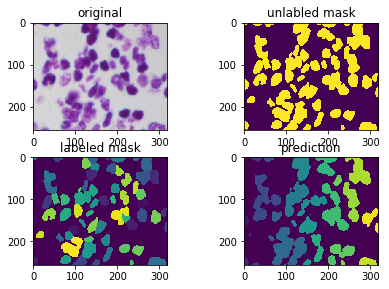

In [6]:

#unlabled prediction (probability of pixle belonging to forground) 
#scaled to the dimensions of the model (e.g. 256x256)
print('making predictions...')
scaled_pred=model.predict_unlabeld(train)


print('rescale probability vector...')
# rescaling performs anti-aliasing, which can disturb lable masks
# it cannot be swhiched of for my version of skimage 0.13.1, only with dev0.14
print("skimage version: {}".format(skimage.__version__))
# for the probability vector antialiasing should be rather beneficial
unlab_pred=train.rescale(scaled_pred, scale=None, dtype=np.float32, mode='reflect')

print('labeling predinctions...')
pred=model.label(unlab_pred, th=0.5) #this function should also use the images
#add labled predictions to container
train.add_pred(pred)
# this adds iou scores to train.features
print( train.features.drop(['ids'], axis=1).head() ) 
print("expected LB score(train): {}".format(np.mean(train.features['iou_score'])))

train.show_image()

100%|██████████████████████████████████████████████████████████████████████████████████| 67/67 [00:09<00:00,  6.72it/s]


making predictions...
rescale probability vector...
labeling predinctions...
expected LB score(val): 0.5259697939590307
                                                 ids  size_x  size_y  \
2  e66f25e175abab08ecb4e5f6859db64a211e0ddffb262d...     256     256   

   n_channels  nuclei_n  nuclei_meanSz  nuclei_stdSz  nuclei_minSz  \
2           1        11            144            66            48   

   nuclei_maxSz  iou_score  iou_th50  iou_th95  
2           259   0.690909       1.0       0.0  


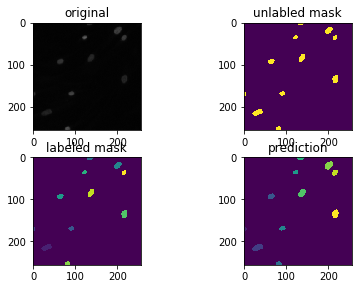

In [7]:
#same on validation data
val.load_images()
val.load_masks()
print('making predictions...')
scaled_pred=model.predict_unlabeld(val)
print('rescale probability vector...')
unlab_pred=val.rescale(scaled_pred, scale=None, dtype=np.float32, mode='reflect')
print('labeling predinctions...')
pred=model.label(unlab_pred, th=0.5) 
val.add_pred(pred)
val.features.drop(['ids'], axis=1).head()
print("expected LB score(val): {}".format(np.mean(val.features['iou_score'])))
val.show_image()

## Prediction (on test data)
* load test data
* use model to predict masks
* prepare submission file

In [8]:
test=Images.Images("../input/stage1_test")

#load the image files (in original size)    
test.load_images()

test.features.head()    


100%|██████████████████████████████████████████████████████████████████████████████████| 65/65 [00:01<00:00, 50.44it/s]


,ids,size_x,size_y,n_channels
0,0114f484a16c152baa2d82fdd43740880a762c93f436c8...,256,256,1
1,0999dab07b11bc85fb8464fc36c947fbd8b5d6ec498173...,519,253,1
2,0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed3...,256,256,1
3,0e132f71c8b4875c3c2dd7a22997468a3e842b46aa9bd4...,256,256,1
4,0ed3555a4bd48046d3b63d8baf03a5aa97e523aa483aaa...,256,256,1


In [9]:
print('making predictions...')
scaled_pred=model.predict_unlabeld(test)


print('rescale probability vector...')
unlab_pred=test.rescale(scaled_pred, scale=None, dtype=np.float32, mode='reflect')

print('labeling predinctions...')
pred=model.label(unlab_pred, th=0.5)
test.add_pred(pred)


making predictions...
rescale probability vector...
labeling predinctions...


In [10]:
submission_file='submission' + model_name + '.csv'
test.write_submission(submission_file)



0

Scores for first test image:
unlabeled IoU: [0.]
unlabeled IoU per nucleus: [0.82524272 0.86238532 0.89962825 0.81873112 0.85620915 0.86057692]
mean IoU: 0.8537955805940195
fraction of nuclei has IoU > 0.5: 1.0
fraction of nuclei has IoU > 0.5: 0.0
IoU score (over range of thresholds): 0.7666666666666666
                                                 ids  size_x  size_y  \
0  e5f8ad0f0a43af8ca57e31e16800108abdfb44a7e962a7...     256     256   

   n_channels  nuclei_n  nuclei_meanSz  nuclei_stdSz  nuclei_minSz  \
0           1         6            198            72            85   

   nuclei_maxSz  iou_score  iou_th50  iou_th95  
0           282   0.766667       1.0       0.0  


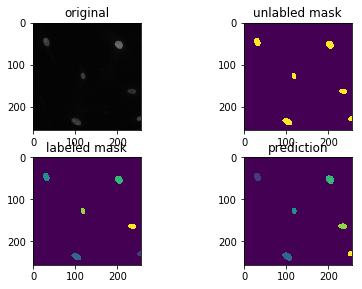

In [11]:

##########
# scores #
##########
print('Scores for first test image:')
#unlabeled IOU
print('unlabeled IoU: {}'.format(Images.iou(val.masks[0] > 0, unlab_pred[0]>0.5)))
#labled IOUs per nucleus
print('unlabeled IoU per nucleus: {}'.format(Images.iou(val.masks[0], val.pred[0])))
#mean IOU
print('mean IoU: {}'.format(np.mean(Images.iou(val.masks[0], val.pred[0]))))
# fraction of nuclei > th
print('fraction of nuclei has IoU > 0.5: {}'.format(Images.iou_score(val.masks[0], val.pred[0], th=[.5])))
print('fraction of nuclei has IoU > 0.95: {}'.format(Images.iou_score(val.masks[0], val.pred[0], th=[.95])))
# fraction of nuclei > th average over range of thresholds
print('IoU score (over range of thresholds): {}'.format(Images.iou_score(val.masks[0], val.pred[0])))

val.show_image(0)